In [1]:
#import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

import re

from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.model_selection import train_test_split

# Import Data:

In [2]:
data_1 = pd.read_csv("analytic_data2019.csv", skiprows=0)

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (0,1,2,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,2

In [3]:
data_1 = data_1.iloc[2:]

In [4]:
xls = pd.ExcelFile('2019 County Health Rankings Data - v2.xls')
# sheet0 = xls.parse(0,skiprows=1) 
# sheet1 = xls.parse(1,skiprows=1) 
# sheet2 = xls.parse(2,skiprows=1) 
sheet3 = xls.parse(3,skiprows=1) 
# sheet4 = xls.parse(4,skiprows=1) 
sheet5 = xls.parse(5,skiprows=1) 
# sheet6 = xls.parse(6,skiprows=1) 

## Merge Datasets into single DataFrames

There are stats for the whole state with in the `data_1` set. Therefore we need to remove the rows which in `Name` does not contain county.

In [5]:
data_1 = data_1.loc[((data_1['County FIPS Code']!='000') & (data_1['County FIPS Code']!=0))]

In [7]:
data_1.head()

,State FIPS Code,County FIPS Code,5-digit FIPS Code,State Abbreviation,Name,Release Year,County Ranked (Yes=1/No=0),Premature death raw value,Premature death numerator,Premature death denominator,...,Male population 18-44 raw value,Male population 45-64 raw value,Male population 65+ raw value,Total male population raw value,Female population 0-17 raw value,Female population 18-44 raw value,Female population 45-64 raw value,Female population 65+ raw value,Total female population raw value,Population growth raw value
3,01,001,01001,AL,Autauga County,2019,1,8824.0571232,815,156132,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,01,003,01003,AL,Baldwin County,2019,1,7224.6321603,2827,576496,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,01,005,01005,AL,Barbour County,2019,1,9586.165037,451,72222,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,01,007,01007,AL,Bibb County,2019,1,11783.543675,445,63653,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,01,009,01009,AL,Blount County,2019,1,10908.101822,1050,161107,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
print(data_1.shape, sheet3.shape, sheet5.shape)

(3142, 534) (3142, 162) (3142, 111)


### Concatenate Data
- Set index as FIFPS code
- Concat on axis=0

In [9]:
data_1.set_index('5-digit FIPS Code', inplace=True)
sheet3.set_index('FIPS', inplace=True)
sheet5.set_index('FIPS', inplace=True)

In [10]:
data_1_Names = list(data_1.Name)

In [11]:
combimed = pd.concat([data_1, sheet5, sheet3], axis=1, sort=False, join='inner')
combimed.shape

(2138, 804)

In [12]:
combimed.head()

,State FIPS Code,County FIPS Code,State Abbreviation,Name,Release Year,County Ranked (Yes=1/No=0),Premature death raw value,Premature death numerator,Premature death denominator,Premature death CI low,...,95% CI - High.17,Quartile.33,% Drive Alone (Black),% Drive Alone (Hispanic),% Drive Alone (White),# Workers who Drive Alone,% Long Commute - Drives Alone,95% CI - Low.18,95% CI - High.18,Quartile.34
21023,21,23,KY,Bracken County,2019,1,14928.2,170,23400,11738.3,...,86.071579,2,NaN,NaN,NaN,2831,57.1,48.576061,65.623939,4
21025,21,25,KY,Breathitt County,2019,1,15397.5,362,37327,13037.6,...,84.148410,1,NaN,NaN,NaN,3034,36.8,30.425810,43.174190,3
21027,21,27,KY,Breckinridge County,2019,1,10021.5,404,55848,8413.79,...,78.655553,1,NaN,NaN,NaN,5660,41.4,36.098207,46.701793,3
21029,21,29,KY,Bullitt County,2019,1,7934.86,1091,225641,7202.84,...,86.865017,4,88.159311,70.746269,79.418516,32148,47.7,44.570213,50.829787,4
21031,21,31,KY,Butler County,2019,1,11348.7,249,35726,9188.25,...,87.569632,3,NaN,NaN,NaN,4210,41.3,35.325896,47.274104,3


## Removing Non-Raw Parameters

In [13]:
cols1 = combimed.columns
cols1 = sorted(cols1)
for col in cols1:
    print(col)

# African American
# Alcohol-Impaired Driving Deaths
# American Indian/Alaskan Native
# Asian
# Associations
# Chlamydia Cases
# Deaths
# Deaths.1
# Deaths.2
# Dentists
# Driving Deaths
# Drug Overdose Deaths
# Firearm Fatalities
# Food Insecure
# HIV Cases
# Hispanic
# Homeowners
# Households
# Households with Severe Cost Burden
# Injury Deaths
# Limited Access
# Mental Health Providers
# Motor Vehicle Deaths
# Native Hawaiian/Other Pacific Islander
# Non-Hispanic White
# Not Proficient in English
# Primary Care Physicians
# Rural
# Single-Parent Households
# Some College
# Unemployed
# Uninsured
# Uninsured
# Uninsured.1
# Workers who Drive Alone
% 65 and older CI high
% 65 and older CI low
% 65 and older denominator
% 65 and older numerator
% 65 and older raw value
% 65 and over
% < 18
% African American
% Alcohol-Impaired
% American Indian and Alaskan Native CI high
% American Indian and Alaskan Native CI low
% American Indian and Alaskan Native denominator
% American Indian and Al

### Remove Unsuitable parameters

In [14]:
df = combimed.copy()

In [15]:
clean_columns = [x for x in df.columns if
                 ("numerator" not in x) and
                 ("denominator" not in x) and
                 ("CI_low" not in x) and
                 ("CI_high" not in x) and
                 ("(White)" not in x) and
                 ("(Black)" not in x) and
                 ("(Hispanic)" not in x) and 
                 ("CI" not in x) and 
                 ("Rate" not in x) and 
                 ("Ratio" not in x) and 
                 ("Percentage" not in x) and 
                 ("%" not in x) and 
                 ("Quartile" not in x)]

In [16]:
df_inital_para = combimed[clean_columns]

### Changing Parameter  Names for Processing in Sklearn

In [17]:
# Manipulate column names
subs = [(' ', '_'),('.',''),("'",""),('™', ''), ('®',''),
        ('+','plus'), ('½','half'), ('-','_'), ('#','Num_'), 
        ('%', 'Per_'), ('<', 'Greater_than_'), ('>', 'Less_than_')
       ]

def col_formatting(col):
    new_cols = []
    for line in col:
        for sub in subs:
            line = line.replace(sub[0], sub[1])
        new_cols.append(line)
    return new_cols

In [18]:
col_new = col_formatting(df_inital_para.columns)
df_inital_para.columns = col_new

In [19]:
cols1 = df_inital_para.columns
cols1 = sorted(cols1)
for col in cols1:
    print(col)

20th_Percentile_Income
80th_Percentile_Income
Access_to_exercise_opportunities_raw_value
Adult_obesity_raw_value
Adult_smoking_raw_value
Age_Adjusted_Mortality
Air_pollution___particulate_matter_raw_value
Alcohol_impaired_driving_deaths_raw_value
Alcohol_related_hospitalizations_raw_value
Annual_Average_Violent_Crimes
Average_Daily_PM25
Cancer_incidence_raw_value
Cerebrovascular_disease_hospitalizations_raw_value
Child_abuse_raw_value
Child_mortality_raw_value
Childhood_immunizations_raw_value
Children_eligible_for_free_or_reduced_price_lunch_raw_value
Children_in_poverty_raw_value
Children_in_single_parent_households_raw_value
Cohort_Size
Communicable_disease_raw_value
Coronary_heart_disease_hospitalizations_raw_value
County
County
County
County
County_FIPS_Code
County_Ranked_(Yes=1/No=0)
Dentists_raw_value
Diabetes_prevalence_raw_value
Disconnected_youth_raw_value
Drinking_water_violations_raw_value
Driving_alone_to_work_raw_value
Drug_arrests_raw_value
Drug_overdose_deaths_raw_value

## Set Target and Predictors
<b>Target</b> = `Life_Expectancy` & `Life_expectancy_raw_value`

In [57]:
y = df_inital_para[['Life_Expectancy', 'Life_expectancy_raw_value']]

In [62]:
X = df_inital_para.drop(columns=['Life_Expectancy', 'Life_expectancy_raw_value'])

In [67]:
X.head()

,State_FIPS_Code,County_FIPS_Code,State_Abbreviation,Name,Release_Year,County_Ranked_(Yes=1/No=0),Premature_death_raw_value,Poor_or_fair_health_raw_value,Poor_physical_health_days_raw_value,Poor_mental_health_days_raw_value,...,Num__Households,Num__Associations,Annual_Average_Violent_Crimes,Num__Injury_Deaths,Average_Daily_PM25,Presence_of_violation,Severe_Housing_Cost_Burden,Overcrowding,Inadequate_Facilities,Num__Workers_who_Drive_Alone
21023,21,23,KY,Bracken County,2019,1,14928.2,0.202522,4.6314,4.42253,...,2010.0,12,4.0,57.0,10.5,No,9.074074,1.966717,1.210287,2831
21025,21,25,KY,Breathitt County,2019,1,15397.5,0.288199,6.00576,5.16271,...,2691.0,5,4.0,99.0,9.7,Yes,8.490566,3.821656,2.183803,3034
21027,21,27,KY,Breckinridge County,2019,1,10021.5,0.19517,4.61148,4.33036,...,4575.0,24,12.5,115.0,11.8,No,8.766551,3.769705,0.753941,5660
21029,21,29,KY,Bullitt County,2019,1,7934.86,0.174408,4.12172,4.14856,...,17765.0,53,95.5,307.0,12.4,No,9.859155,1.202901,0.548381,32148
21031,21,31,KY,Butler County,2019,1,11348.7,0.230237,4.97789,4.6383,...,2811.0,18,10.0,69.0,11.1,No,9.462151,2.898551,1.449275,4210


We only want 1 target variable for the models:

In [64]:
y.drop(columns=['Life_expectancy_raw_value'], inplace=True)

In [66]:
y.head()

,Life_Expectancy
21023,72.438750
21025,70.426037
21027,75.056297
21029,77.644415
21031,74.386212


In [73]:
df_inital = df_inital_para.drop(columns=['Life_expectancy_raw_value'])

In [88]:
# cols1 = df_inital.columns
# cols1 = sorted(cols1)
# for col in cols1:
#     print(col)

## Null Values & Variable Type  - Continuous & Categoric &  Dummies for Categoric

In [ ]:
df_inital.shape[0] /2

In [89]:
removal = []
for col in df_inital.columns:
    if df_inital[col].isna().sum() != 0:
        print(df_inital[col].isna().sum(), col)

47 Premature_death_raw_value
85 Low_birthweight_raw_value
15 Food_environment_index_raw_value
23 Alcohol_impaired_driving_deaths_raw_value
121 Sexually_transmitted_infections_raw_value
111 Teen_births_raw_value
94 Primary_care_physicians_raw_value
49 Dentists_raw_value
168 Mental_health_providers_raw_value
17 Preventable_hospital_stays_raw_value
5 Mammography_screening_raw_value
3 Flu_vaccinations_raw_value
83 High_school_graduation_raw_value
114 Violent_crime_raw_value
80 Injury_deaths_raw_value
38 Drinking_water_violations_raw_value
47 Premature_age_adjusted_mortality_raw_value
811 Child_mortality_raw_value
1261 Infant_mortality_raw_value
502 HIV_prevalence_raw_value
15 Limited_access_to_healthy_foods_raw_value
914 Drug_overdose_deaths_raw_value
302 Motor_vehicle_crash_deaths_raw_value
21 Other_primary_care_providers_raw_value
1154 Disconnected_youth_raw_value
114 Children_eligible_for_free_or_reduced_price_lunch_raw_value
735 Residential_segregation___Black/White_raw_value
246 Resid

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [82]:
for col in df_inital.columns:
    print(df_inital[col].dtypes, col)

object State_FIPS_Code
object County_FIPS_Code
object State_Abbreviation
object Name
object Release_Year
object County_Ranked_(Yes=1/No=0)
object Premature_death_raw_value
object Poor_or_fair_health_raw_value
object Poor_physical_health_days_raw_value
object Poor_mental_health_days_raw_value
object Low_birthweight_raw_value
object Adult_smoking_raw_value
object Adult_obesity_raw_value
object Food_environment_index_raw_value
object Physical_inactivity_raw_value
object Access_to_exercise_opportunities_raw_value
object Excessive_drinking_raw_value
object Alcohol_impaired_driving_deaths_raw_value
object Sexually_transmitted_infections_raw_value
object Teen_births_raw_value
object Uninsured_raw_value
object Primary_care_physicians_raw_value
object Dentists_raw_value
object Mental_health_providers_raw_value
object Preventable_hospital_stays_raw_value
object Mammography_screening_raw_value
object Flu_vaccinations_raw_value
object High_school_graduation_raw_value
object Some_college_raw_value


## Normalization & Heteroscedasticity Checks


In [75]:
len(df_inital.columns)

167

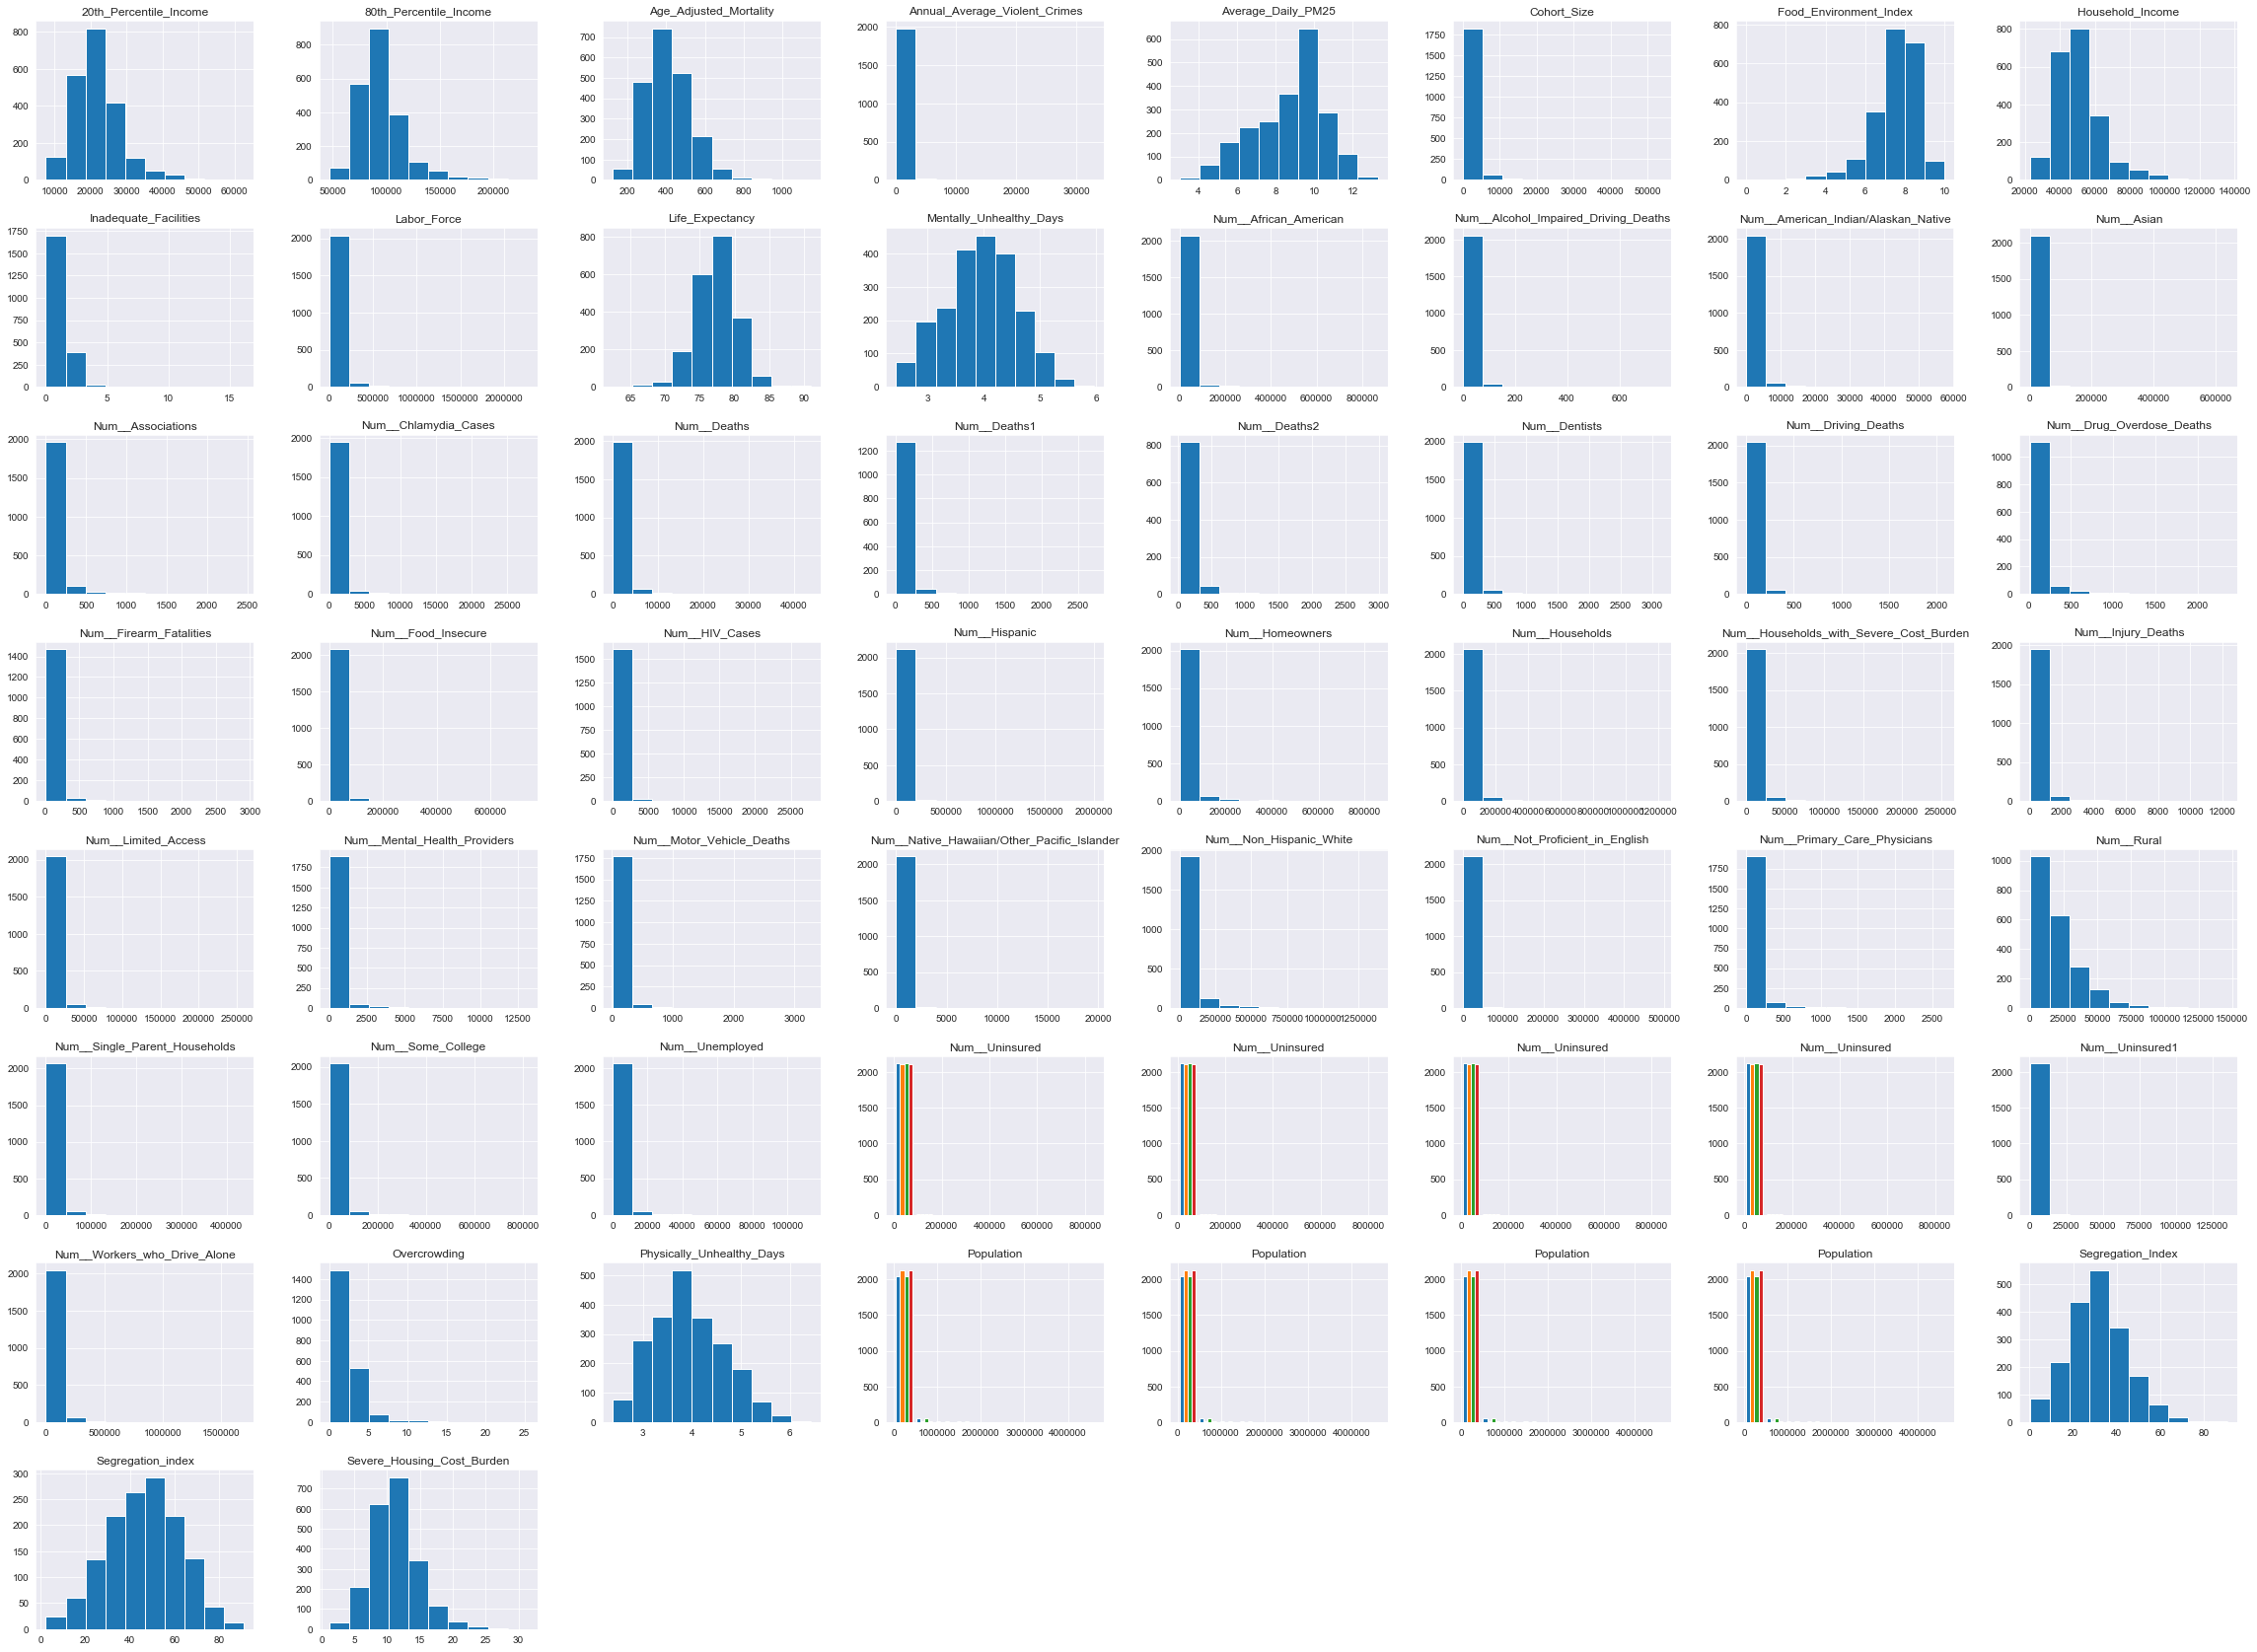

In [77]:
df_inital.hist(figsize=(40,30))
plt.show()

In [ ]:
sns.pairplot(df_inital)

In [ ]:
f = 'Life_expectancy~radio'
model = smf.ols(formula=f, data=data).fit()
print ('R-Squared:',model.rsquared)
print (model.params)
X_new = pd.DataFrame({'radio': [data.radio.min(), data.radio.max()]});
preds = model.predict(X_new)
data.plot(kind='scatter', x='radio', y='sales');
plt.plot(X_new, preds, c='red', linewidth=2);
plt.show()
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "radio", fig=fig)
plt.show()
import scipy.stats as stats
residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()

## Data Exploration:

Create dataframe for description of columns + Re import , drop first row 

In [11]:
def data_nUnique_values(df):
    print("DataFrame Shape:", df.shape)
    print("----------------------------")
    for n in df.columns:
        if df[n].isna().sum() != df.shape[0]:
            print(n, df[n].nunique(), df[n].isna().sum())

In [12]:
# data_nUnique_values(combimed)

## Set Target and Predictors:

In [13]:
outcomes = ['Life_Expectancy',
 'Life_Expectancy_(Black)',
 'Life_Expectancy_(Hispanic)',
 'Life_Expectancy_(White)',
 'Life_expectancy_(Black)',
 'Life_expectancy_(Hispanic)',
 'Life_expectancy_(White)',
 'Life_expectancy_CI_high',
 'Life_expectancy_CI_low',
 'Life_expectancy_denominator',
 'Life_expectancy_numerator',
 'Life_expectancy_raw_value']

predictors = list(combimed.columns)

In [14]:
predictors = [x for x in predictors if x not in outcomes]

In [15]:
df_y = combimed[['Life_Expectancy',
 'Life_Expectancy_(Black)',
 'Life_Expectancy_(Hispanic)',
 'Life_Expectancy_(White)',
 'Life_expectancy_(Black)',
 'Life_expectancy_(Hispanic)',
 'Life_expectancy_(White)',
 'Life_expectancy_CI_high',
 'Life_expectancy_CI_low',
 'Life_expectancy_denominator',
 'Life_expectancy_numerator',
 'Life_expectancy_raw_value']]

In [16]:
df_y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3195 entries, 0 to 3194
Data columns (total 12 columns):
Life_Expectancy                3073 non-null float64
Life_Expectancy_(Black)        1339 non-null float64
Life_Expectancy_(Hispanic)     1247 non-null float64
Life_Expectancy_(White)        1726 non-null float64
Life_expectancy_(Black)        1340 non-null object
Life_expectancy_(Hispanic)     1248 non-null object
Life_expectancy_(White)        1727 non-null object
Life_expectancy_CI_high        3124 non-null object
Life_expectancy_CI_low         3124 non-null object
Life_expectancy_denominator    0 non-null object
Life_expectancy_numerator      0 non-null object
Life_expectancy_raw_value      3124 non-null object
dtypes: float64(4), object(8)
memory usage: 299.7+ KB


In [17]:
def data_type(df, cols, datatype='str'):
    for col in cols:
        df[col] = df[col].astype(datatype)
    
    return df.info()

In [18]:
data_type(df_y, outcomes, 'float')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3195 entries, 0 to 3194
Data columns (total 12 columns):
Life_Expectancy                3073 non-null float64
Life_Expectancy_(Black)        1339 non-null float64
Life_Expectancy_(Hispanic)     1247 non-null float64
Life_Expectancy_(White)        1726 non-null float64
Life_expectancy_(Black)        1340 non-null float64
Life_expectancy_(Hispanic)     1248 non-null float64
Life_expectancy_(White)        1727 non-null float64
Life_expectancy_CI_high        3124 non-null float64
Life_expectancy_CI_low         3124 non-null float64
Life_expectancy_denominator    0 non-null float64
Life_expectancy_numerator      0 non-null float64
Life_expectancy_raw_value      3124 non-null float64
dtypes: float64(12)
memory usage: 299.7 KB


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [19]:
life_mean = df_y.mean(axis=1)

Target = life_mean

predictors = "everything else"

# Create Model DataFrame

In [22]:
df_model = combimed[predictors]

In [23]:
df_model['Life_Expectancy_Mean'] = life_mean

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [24]:
df_model.head()

,State_FIPS_Code,County_FIPS_Code,5_digit_FIPS_Code,State_Abbreviation,Name,Release_Year,County_Ranked_(Yes=1/No=0),Premature_death_raw_value,Premature_death_numerator,Premature_death_denominator,...,Quartile33,Per__Drive_Alone_(Black),Per__Drive_Alone_(Hispanic),Per__Drive_Alone_(White),Num__Workers_who_Drive_Alone,Per__Long_Commute___Drives_Alone,95Per__CI___Low18,95Per__CI___High18,Quartile34,Life_Expectancy_Mean
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3,82.722037,NaN,83.710021,20911.0,38.3,34.362673,42.237327,3,75.756145
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2,84.921904,68.343876,83.799135,74415.0,40.5,38.183480,42.816520,3,82.701328
2,01,000,01000,AL,Alabama,2019,NaN,9917.2328984,80440,13636816,...,1,80.154701,NaN,86.245265,7242.0,33.8,28.867176,38.732824,2,75.637862
3,01,001,01001,AL,Autauga County,2019,1,8824.0571232,815,156132,...,3,NaN,NaN,NaN,6930.0,48.6,40.310796,56.889204,4,75.032760
4,01,003,01003,AL,Baldwin County,2019,1,7224.6321603,2827,576496,...,3,NaN,81.767181,83.414506,18426.0,59.7,55.480714,63.919286,4,79.475268


# Train Test Split

In [ ]:
train, test = train_test_split(df_model, test_size=34)

In [ ]:
# Your code here - Fit the actual model
print("Train:", len(train),"\nTest:", len(test), "\n%_test:",(len(test)/(len(test)+len(train)))*100 )